In [2]:
import pandas as pd
import matplotlib
from calendar import day_name as dn

df = pd.read_csv('Netflix_Data\CONTENT_INTERACTION\ViewingActivity.csv')

In [2]:
df.shape

(11256, 10)

In [3]:
df.head(10)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Alec,2024-03-11 05:30:06,00:23:43,NaN,Avatar: The Last Airbender: Book 1: The Fortun...,NaN,Roku Fruitland Sound Bar,00:23:49,00:23:49,US (United States)
1,Alec,2024-03-11 05:19:23,00:10:39,NaN,Avatar: The Last Airbender: Book 1: The Blue S...,NaN,Roku Fruitland Sound Bar,00:23:47,00:23:47,US (United States)
2,Alec,2024-03-11 05:17:46,00:01:13,Autoplayed: user action: None;,Trailer: Damsel,TRAILER,Roku Fruitland Sound Bar,00:01:13,00:01:13,US (United States)
3,Alec,2024-03-07 22:23:35,00:10:46,NaN,Avatar: The Last Airbender: Book 1: The Blue S...,NaN,Apple iPhone 11 Pro,00:13:08,Not latest view,US (United States)
4,Alec,2024-03-07 20:49:49,00:21:10,NaN,Avatar The Last Airbender: Season 1: Warriors ...,NaN,Amazon TVAFTBL Smart TV,00:21:15,00:21:15,US (United States)
5,Alec,2024-03-07 19:51:02,00:58:43,Autoplayed: user action: User_Interaction;,Avatar The Last Airbender: Season 1: Aang (Epi...,NaN,Amazon TVAFTBL Smart TV,00:58:43,00:58:43,US (United States)
6,Alec,2024-03-07 19:50:04,00:00:32,Autoplayed: user action: None;,Bodyguard: Season 1 (Trailer),TRAILER,Amazon TVAFTBL Smart TV,00:00:33,00:00:33,US (United States)
7,Alec,2024-03-07 19:48:20,00:00:14,Autoplayed: user action: None;,Season 1 Relatable Clip: The Gentlemen,HOOK,Amazon TVAFTBL Smart TV,00:00:14,00:00:14,US (United States)
8,Alec,2024-03-07 07:00:50,00:02:16,NaN,Avatar: The Last Airbender: Book 1: The Blue S...,NaN,Roku Fruitland Sound Bar,00:02:22,Not latest view,US (United States)
9,Alec,2024-03-07 06:36:00,00:24:04,Autoplayed: user action: User_Interaction;,Avatar: The Last Airbender: Book 1: The Storm ...,NaN,Roku Fruitland Sound Bar,00:23:55,00:23:55,US (United States)


In [4]:
#drop any entries with specific supplemental video type
df['Supplemental Video Type'].fillna(value='NaN', inplace=True)
df = df[df['Supplemental Video Type'].str.contains('NaN', regex=False)]

#drop various columns with unnecessary info
df = df.drop(['Supplemental Video Type', 'Bookmark', 'Latest Bookmark'], axis=1)

#convert start time from string to datetime type
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)

#convert start time to US/central timezone
df = df.set_index('Start Time')
df.index = df.index.tz_convert('US/Central')
df = df.reset_index()

#convert duration from string to time delta
df['Duration'] = pd.to_timedelta(df['Duration'])

#remove any entries with minimal watch time
df = df[(df['Duration'] > '0 days 00:01:30')]

#add columns for watch day and watch hour
df['weekday'] = df['Start Time'].dt.weekday
df['hour'] = df['Start Time'].dt.hour

df.head(10)

C:\Users\cgaru\AppData\Local\Temp\ipykernel_23724\3731143972.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Supplemental Video Type'].fillna(value='NaN', inplace=True)


,Start Time,Profile Name,Duration,Attributes,Title,Device Type,Country,weekday,hour
0,2024-03-11 00:30:06-05:00,Alec,0 days 00:23:43,NaN,Avatar: The Last Airbender: Book 1: The Fortun...,Roku Fruitland Sound Bar,US (United States),0,0
1,2024-03-11 00:19:23-05:00,Alec,0 days 00:10:39,NaN,Avatar: The Last Airbender: Book 1: The Blue S...,Roku Fruitland Sound Bar,US (United States),0,0
2,2024-03-07 16:23:35-06:00,Alec,0 days 00:10:46,NaN,Avatar: The Last Airbender: Book 1: The Blue S...,Apple iPhone 11 Pro,US (United States),3,16
3,2024-03-07 14:49:49-06:00,Alec,0 days 00:21:10,NaN,Avatar The Last Airbender: Season 1: Warriors ...,Amazon TVAFTBL Smart TV,US (United States),3,14
4,2024-03-07 13:51:02-06:00,Alec,0 days 00:58:43,Autoplayed: user action: User_Interaction;,Avatar The Last Airbender: Season 1: Aang (Epi...,Amazon TVAFTBL Smart TV,US (United States),3,13
5,2024-03-07 01:00:50-06:00,Alec,0 days 00:02:16,NaN,Avatar: The Last Airbender: Book 1: The Blue S...,Roku Fruitland Sound Bar,US (United States),3,1
6,2024-03-07 00:36:00-06:00,Alec,0 days 00:24:04,Autoplayed: user action: User_Interaction;,Avatar: The Last Airbender: Book 1: The Storm ...,Roku Fruitland Sound Bar,US (United States),3,0
7,2024-03-06 00:30:27-06:00,Alec,0 days 00:24:33,NaN,Avatar: The Last Airbender: Book 1: The Great ...,Roku Fruitland Sound Bar,US (United States),2,0
8,2024-03-06 00:06:37-06:00,Alec,0 days 00:23:45,NaN,Avatar: The Last Airbender: Book 1: Jet (Episo...,Roku Fruitland Sound Bar,US (United States),2,0
9,2024-03-04 18:16:23-06:00,Alec,0 days 00:24:38,NaN,Avatar: The Last Airbender: Book 1: The Waterb...,Apple iPhone 11 Pro,US (United States),0,18


In [5]:
df['Duration'].sum()

Timedelta('191 days 22:06:52')

In [6]:
def profiledf(df, pname):
    pdf = df[df['Profile Name'].str.contains(pname, regex=False)]
    return pdf

In [7]:
gwynne = profiledf(df, 'Gwynne')
gwynne.shape

(1502, 9)

In [8]:
gwynne.head(10)

,Start Time,Profile Name,Duration,Attributes,Title,Device Type,Country,weekday,hour
9289,2024-02-22 13:59:02-06:00,Gwynne,0 days 01:27:40,NaN,Murder Mystery 2,Comcast X1 ARM WITH SAGE MVPD STB,US (United States),3,13
9290,2024-02-22 11:38:01-06:00,Gwynne,0 days 01:30:36,NaN,Murder Mystery,Comcast X1 ARM WITH SAGE MVPD STB,US (United States),3,11
9291,2024-02-22 08:34:39-06:00,Gwynne,0 days 02:00:38,Autoplayed: user action: User_Interaction;,Players,Comcast X1 ARM WITH SAGE MVPD STB,US (United States),3,8
9292,2024-02-17 14:34:53-06:00,Gwynne,0 days 00:38:37,NaN,Sweet Magnolias: Season 3: Meaning to Tell You...,Comcast X1 ARM WITH SAGE MVPD STB,US (United States),5,14
9293,2024-02-06 15:39:29-06:00,Gwynne,0 days 00:41:53,NaN,American Nightmare: Season 1: Part Three: The ...,Comcast X1 ARM WITH SAGE MVPD STB,US (United States),1,15
9294,2024-02-06 14:53:46-06:00,Gwynne,0 days 00:43:51,NaN,American Nightmare: Season 1: Part Two: Gone G...,Comcast X1 ARM WITH SAGE MVPD STB,US (United States),1,14
9295,2024-02-06 14:06:26-06:00,Gwynne,0 days 00:45:26,Autoplayed: user action: User_Interaction;,American Nightmare: Season 1: Part One: The Bo...,Comcast X1 ARM WITH SAGE MVPD STB,US (United States),1,14
9296,2024-01-12 15:23:31-06:00,Gwynne,0 days 00:57:47,NaN,Breaking Bad: Season 1: Pilot (Episode 1),Comcast X1 ARM WITH SAGE MVPD STB,US (United States),4,15
9297,2024-01-12 11:29:08-06:00,Gwynne,0 days 01:46:22,Autoplayed: user action: User_Interaction;,Tyler Perry's The Single Moms Club,Comcast X1 ARM WITH SAGE MVPD STB,US (United States),4,11
9298,2024-01-11 17:02:50-06:00,Gwynne,0 days 00:18:46,NaN,Ginny & Georgia: Season 2: Hark! Darkness Desc...,Comcast X1 ARM WITH SAGE MVPD STB,US (United States),3,17


In [9]:
names = []

for index, row in df.iterrows():
    curName = row['Profile Name']
    foundName = False
    for name in names:
        if curName == name:
            foundName = True
    if not foundName:
        names.append(curName)

for name in names:
    print(name)

Alec
Gwynne


In [10]:
def compressShows(df):
    zerot = pd.Timedelta(0)
    newdf = pd.DataFrame(columns=['Total Watchtime', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
    for index, row in df.iterrows():
        curName = row['Title']
        if 'episode ' in curName.lower():
            newName = curName.split(':')[0]
        else:
            newName = curName
        if not newName in newdf.index:
            newdf = pd.concat([newdf, pd.DataFrame({'Total Watchtime': zerot, 'Sunday': zerot, 'Monday': zerot, 'Tuesday': zerot, 'Wednesday': zerot, 'Thursday': zerot, 'Friday': zerot, 'Saturday': zerot}, index=[newName])])
        newdf.loc[newName, 'Total Watchtime'] += row['Duration']
        newdf.loc[newName, row['weekday']] += row['Duration']
    newdf = newdf.sort_values(by='Total Watchtime', ascending=False)
    return newdf
            

In [11]:
alec = profiledf(df, 'Alec')
#newdf = compressShows(alec)

In [12]:
#newdf.shape

In [13]:
#newdf.head(20)

In [14]:
alec.head(10)

,Start Time,Profile Name,Duration,Attributes,Title,Device Type,Country,weekday,hour
0,2024-03-11 00:30:06-05:00,Alec,0 days 00:23:43,NaN,Avatar: The Last Airbender: Book 1: The Fortun...,Roku Fruitland Sound Bar,US (United States),0,0
1,2024-03-11 00:19:23-05:00,Alec,0 days 00:10:39,NaN,Avatar: The Last Airbender: Book 1: The Blue S...,Roku Fruitland Sound Bar,US (United States),0,0
2,2024-03-07 16:23:35-06:00,Alec,0 days 00:10:46,NaN,Avatar: The Last Airbender: Book 1: The Blue S...,Apple iPhone 11 Pro,US (United States),3,16
3,2024-03-07 14:49:49-06:00,Alec,0 days 00:21:10,NaN,Avatar The Last Airbender: Season 1: Warriors ...,Amazon TVAFTBL Smart TV,US (United States),3,14
4,2024-03-07 13:51:02-06:00,Alec,0 days 00:58:43,Autoplayed: user action: User_Interaction;,Avatar The Last Airbender: Season 1: Aang (Epi...,Amazon TVAFTBL Smart TV,US (United States),3,13
5,2024-03-07 01:00:50-06:00,Alec,0 days 00:02:16,NaN,Avatar: The Last Airbender: Book 1: The Blue S...,Roku Fruitland Sound Bar,US (United States),3,1
6,2024-03-07 00:36:00-06:00,Alec,0 days 00:24:04,Autoplayed: user action: User_Interaction;,Avatar: The Last Airbender: Book 1: The Storm ...,Roku Fruitland Sound Bar,US (United States),3,0
7,2024-03-06 00:30:27-06:00,Alec,0 days 00:24:33,NaN,Avatar: The Last Airbender: Book 1: The Great ...,Roku Fruitland Sound Bar,US (United States),2,0
8,2024-03-06 00:06:37-06:00,Alec,0 days 00:23:45,NaN,Avatar: The Last Airbender: Book 1: Jet (Episo...,Roku Fruitland Sound Bar,US (United States),2,0
9,2024-03-04 18:16:23-06:00,Alec,0 days 00:24:38,NaN,Avatar: The Last Airbender: Book 1: The Waterb...,Apple iPhone 11 Pro,US (United States),0,18


In [31]:
def compress2(df):

    newdf = df.drop(['Start Time', 'Profile Name', 'Attributes', 'Device Type', 'Country', 'hour'], axis=1)
    newdf['Title'] = newdf['Title'].str.split(':').str[0]
    newdf = newdf.groupby(['Title', 'weekday'], as_index=False).sum()
    newdf['Total Duration'] = newdf.groupby(['Title'])['Duration'].transform('sum')
    #newdf = newdf.sort_values('Total Duration', ascending=False).groupby(['Title', 'weekday', 'Total Duration'])['Duration'].sum()
    #newdf['Total'] = newdf.groupby('Title')['Duration'].transform(sum)
    newdf = newdf.sort_values(by=['Total Duration', 'weekday'], ascending=[False, True])
    newdf['weekday'] = newdf['weekday'].apply(lambda x: dn[x])
    
    return newdf

alecgb = compress2(alec)
alecgb.head(30)

,Title,weekday,Duration,Total Duration
292,The Office (U.S.),Monday,6 days 09:45:46,45 days 21:53:32
293,The Office (U.S.),Tuesday,6 days 01:41:49,45 days 21:53:32
294,The Office (U.S.),Wednesday,6 days 14:13:51,45 days 21:53:32
295,The Office (U.S.),Thursday,8 days 09:24:33,45 days 21:53:32
296,The Office (U.S.),Friday,7 days 10:44:20,45 days 21:53:32
297,The Office (U.S.),Saturday,5 days 03:41:52,45 days 21:53:32
298,The Office (U.S.),Sunday,5 days 20:21:21,45 days 21:53:32
187,New Girl,Monday,3 days 14:23:26,26 days 00:44:55
188,New Girl,Tuesday,3 days 11:53:48,26 days 00:44:55
189,New Girl,Wednesday,3 days 23:53:50,26 days 00:44:55


In [28]:
watchtime = alecgb.groupby(['Title'])['Duration'].sum().sort_values(ascending=False)
watchtime.head(20)

Title
The Office (U.S.)                 45 days 21:53:32
New Girl                          26 days 00:44:55
Parks and Recreation              18 days 10:25:41
Shameless (U.S.)                  13 days 03:37:57
Arrested Development               6 days 05:26:41
JoJo's Bizarre Adventure           4 days 18:55:39
Stranger Things                    3 days 11:05:19
Avatar                             2 days 21:01:52
Naruto                             2 days 13:32:28
Arrow                              1 days 23:42:39
Riverdale                          1 days 16:13:42
Fullmetal Alchemist                1 days 15:32:32
Chilling Adventures of Sabrina     1 days 10:59:37
Marvel's Agents of S.H.I.E.L.D.    1 days 06:39:02
Breaking Bad                       1 days 06:32:46
Black Mirror                       1 days 03:01:11
Marvel's Iron Fist                 1 days 00:00:28
Haikyu!!                           0 days 19:31:39
The Legend of Korra                0 days 19:20:55
ONE PIECE                

<Axes: title={'center': 'Most Watched Shows'}, xlabel='Title'>

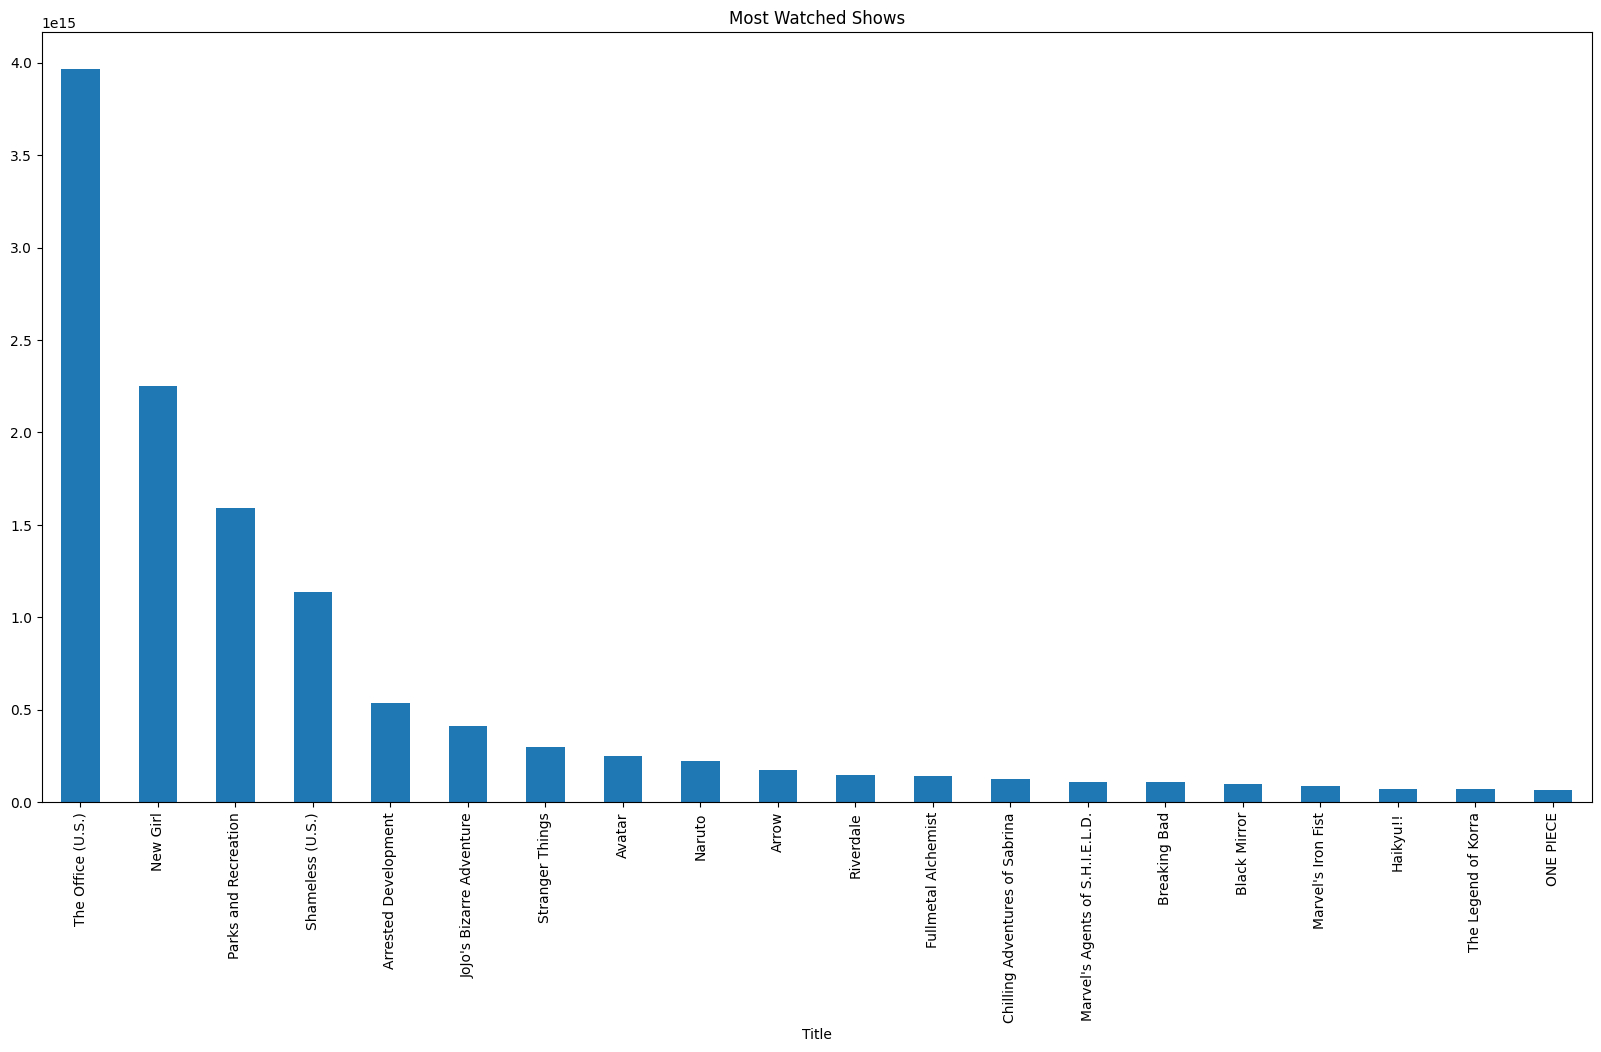

In [29]:
watchtime.head(20).plot(kind='bar', figsize=(20,10), title='Most Watched Shows')

In [53]:
days = alecgb.groupby(['weekday'])['Duration'].sum()
days.head(7)

weekday
Friday      22 days 15:24:56
Monday      19 days 14:06:01
Saturday    19 days 08:59:34
Sunday      21 days 11:15:16
Thursday    25 days 22:30:29
Tuesday     19 days 14:57:18
Wednesday   22 days 15:39:13
Name: Duration, dtype: timedelta64[ns]

<Axes: title={'center': 'Watchtime by Day'}, xlabel='weekday'>

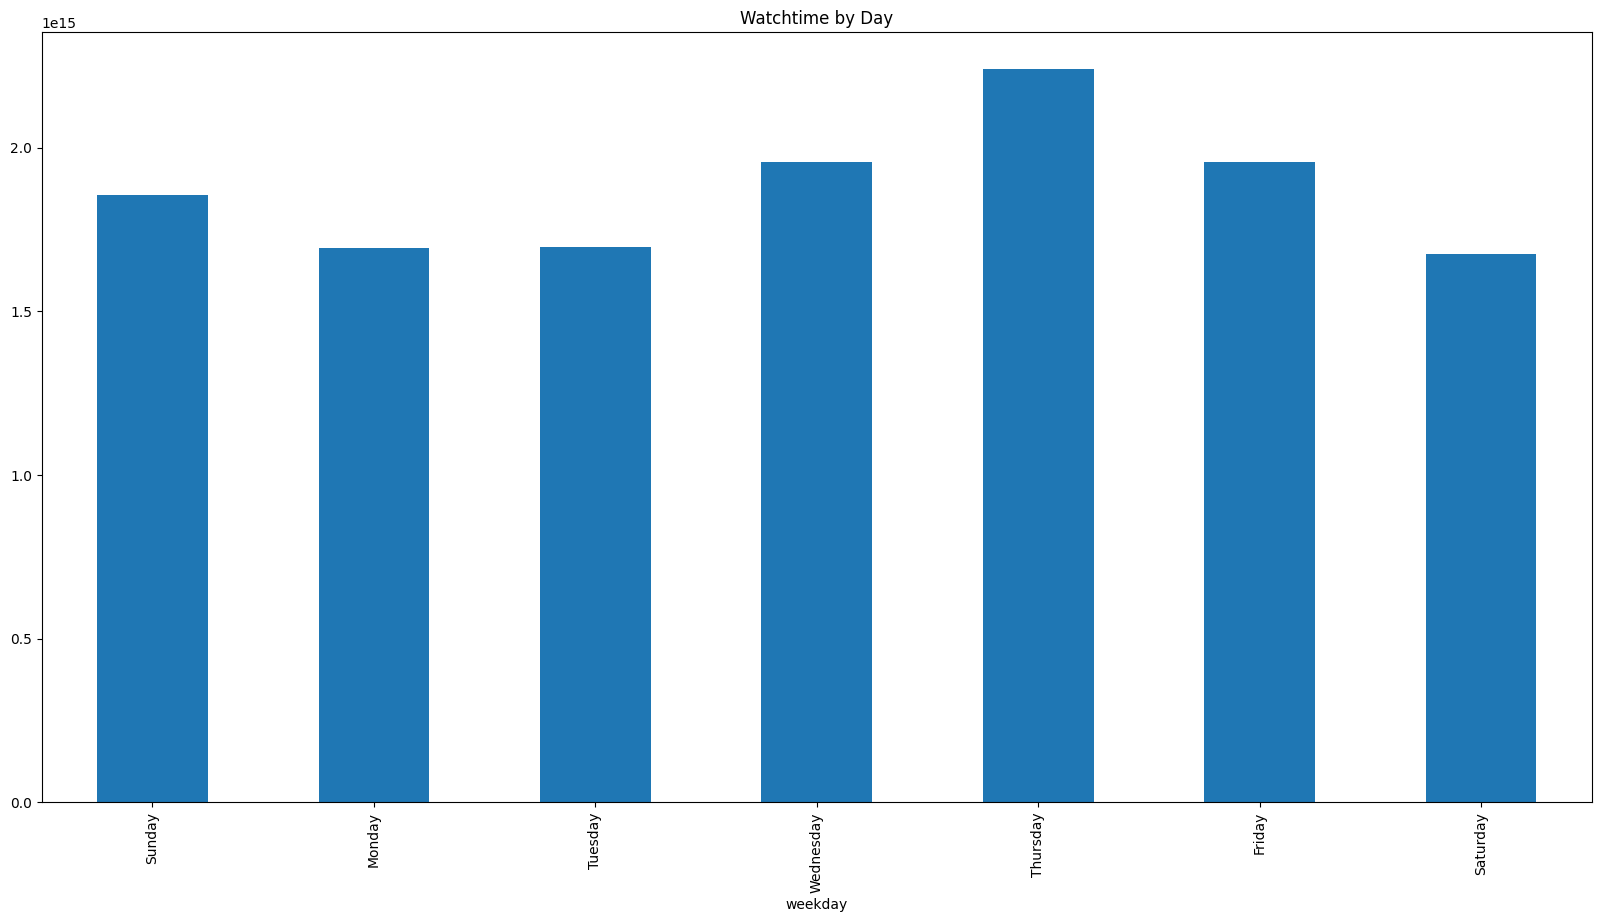

In [54]:

days = days.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], level='weekday')
#days['weekday'] = pd.Categorical(days['weekday'], categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ordered=True)
days.plot(kind='bar', figsize=(20,10), title='Watchtime by Day')
#ays.head(7)